In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score
data = pd.read_csv('../dataset/data_7diagnosis.csv')
df = data.drop('Diagnosis', axis=1)
diagnosis=data.Diagnosis

## ACP

In [43]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
pca = PCA(n_components=2)
pcs = pca.fit_transform(X)
pcs = pd.DataFrame(pcs,columns=[f"PC{i}" for i in range(1, 3)])
X['z'] = data['Diagnosis']
pcs['z'] = data['Diagnosis']

## LDA/QDA/NB

In [44]:
models = [
(LinearDiscriminantAnalysis, "LDA"),
(QuadraticDiscriminantAnalysis, "QDA"),
(GaussianNB, "NB"),
]
#sans score F1 :
"""def validation_errors(df, models):
    y = df.z
    X = df.drop(columns=["z"])
    for model, name in models:
        for acc in cross_val_score(model(), X, y, cv=10):
            yield name, acc"""

#avec score F1
def validation_errors(df, models):
    y = df.z
    X = df.drop(columns=["z"])
    for model, name in models:
        acc_scores = cross_val_score(model(), X, y, cv=10)
        f1_scores = cross_val_score(model(), X, y, cv=10, scoring='f1_macro')
        for acc, f1 in zip(acc_scores, f1_scores):
            yield name, acc, f1

scores_discri = pd.DataFrame(validation_errors(pcs, models), columns=["Model", "Acc","F1"])

print(scores_discri)

   Model       Acc        F1
0    LDA  0.561983  0.401753
1    LDA  0.583333  0.397199
2    LDA  0.741667  0.446135
3    LDA  0.700000  0.422636
4    LDA  0.650000  0.393665
5    LDA  0.691667  0.419230
6    LDA  0.658333  0.409324
7    LDA  0.650000  0.400103
8    LDA  0.500000  0.342678
9    LDA  0.533333  0.338330
10   QDA  0.545455  0.385481
11   QDA  0.566667  0.412242
12   QDA  0.733333  0.509981
13   QDA  0.750000  0.511526
14   QDA  0.641667  0.387020
15   QDA  0.733333  0.502541
16   QDA  0.675000  0.418834
17   QDA  0.675000  0.493953
18   QDA  0.458333  0.354764
19   QDA  0.500000  0.410530
20    NB  0.520661  0.378980
21    NB  0.566667  0.381103
22    NB  0.741667  0.516442
23    NB  0.750000  0.511526
24    NB  0.625000  0.382601
25    NB  0.700000  0.480057
26    NB  0.666667  0.414251
27    NB  0.641667  0.450345
28    NB  0.408333  0.331540
29    NB  0.533333  0.417689


## KNN

In [45]:
cls = KNeighborsClassifier(n_neighbors=4)
cls.fit(pcs.drop(columns="z"),diagnosis)

scores_KNN = pd.DataFrame({"Acc":cross_val_score(cls, pcs.drop(columns="z"), diagnosis, cv=10), "F1": cross_val_score(cls, pcs.drop(columns="z"), diagnosis, cv=10,scoring='f1_macro')})
scores_KNN.insert(loc=0, column='Model', value='KNN')
print(scores_KNN)



  Model       Acc        F1
0   KNN  0.504132  0.405179
1   KNN  0.750000  0.605436
2   KNN  0.858333  0.677285
3   KNN  0.866667  0.637116
4   KNN  0.783333  0.652654
5   KNN  0.875000  0.750916
6   KNN  0.891667  0.785934
7   KNN  0.691667  0.581395
8   KNN  0.533333  0.433653
9   KNN  0.541667  0.447619


## Régression logistique

In [46]:
#linéaire
cls = LogisticRegression(penalty=None)
cls.fit(pcs.drop(columns="z"), diagnosis)

scores_reg_lin = pd.DataFrame({"Acc":cross_val_score(cls, pcs.drop(columns="z"), diagnosis, cv=10, scoring='accuracy'), "F1": cross_val_score(cls, pcs.drop(columns="z"), diagnosis, cv=10,scoring='f1_macro')})
scores_reg_lin.insert(loc=0, column='Model', value='LRL')
#multiple
poly = PolynomialFeatures(degree=3)
cls = LogisticRegression()
pipe = make_pipeline(poly, cls)
pipe.fit(pcs.drop(columns="z"), diagnosis)

scores_reg_quad = pd.DataFrame({"Acc":cross_val_score(cls, pcs.drop(columns="z"), diagnosis, cv=10, scoring='accuracy'),"F1": cross_val_score(cls, pcs.drop(columns="z"), diagnosis, cv=10,scoring='f1_macro')})
scores_reg_quad.insert(loc=0, column='Model', value='LRQ')

print(scores_reg_lin)
print(scores_reg_quad)

c:\users\felic\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Model       Acc        F1
0   LRL  0.578512  0.406011
1   LRL  0.591667  0.433514
2   LRL  0.716667  0.429157
3   LRL  0.691667  0.416538
4   LRL  0.625000  0.426143
5   LRL  0.708333  0.484989
6   LRL  0.650000  0.402727
7   LRL  0.658333  0.408579
8   LRL  0.533333  0.424125
9   LRL  0.541667  0.374545
  Model       Acc        F1
0   LRQ  0.570248  0.399432
1   LRQ  0.608333  0.440925
2   LRQ  0.716667  0.429157
3   LRQ  0.691667  0.416538
4   LRQ  0.633333  0.432701
5   LRQ  0.708333  0.484989
6   LRQ  0.650000  0.401407
7   LRQ  0.658333  0.408579
8   LRQ  0.541667  0.429176
9   LRQ  0.541667  0.374545


## Analyse graphique

   Model       Acc        F1
0    LDA  0.561983  0.401753
1    LDA  0.583333  0.397199
2    LDA  0.741667  0.446135
3    LDA  0.700000  0.422636
4    LDA  0.650000  0.393665
5    LDA  0.691667  0.419230
6    LDA  0.658333  0.409324
7    LDA  0.650000  0.400103
8    LDA  0.500000  0.342678
9    LDA  0.533333  0.338330
10   QDA  0.545455  0.385481
11   QDA  0.566667  0.412242
12   QDA  0.733333  0.509981
13   QDA  0.750000  0.511526
14   QDA  0.641667  0.387020
15   QDA  0.733333  0.502541
16   QDA  0.675000  0.418834
17   QDA  0.675000  0.493953
18   QDA  0.458333  0.354764
19   QDA  0.500000  0.410530
20    NB  0.520661  0.378980
21    NB  0.566667  0.381103
22    NB  0.741667  0.516442
23    NB  0.750000  0.511526
24    NB  0.625000  0.382601
25    NB  0.700000  0.480057
26    NB  0.666667  0.414251
27    NB  0.641667  0.450345
28    NB  0.408333  0.331540
29    NB  0.533333  0.417689
30   KNN  0.504132  0.405179
31   KNN  0.750000  0.605436
32   KNN  0.858333  0.677285
33   KNN  0.86

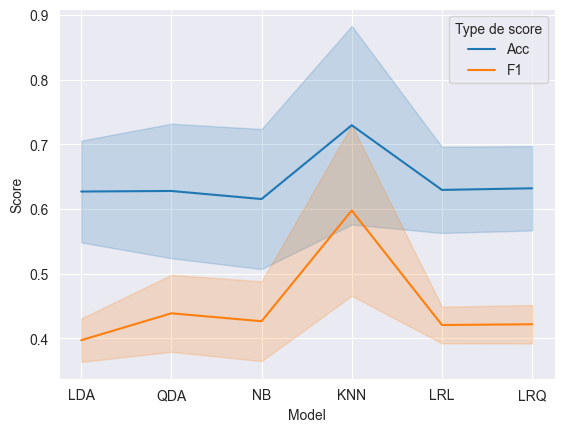

In [47]:
scores= pd.concat([scores_discri, scores_KNN, scores_reg_lin, scores_reg_quad], ignore_index=True)
print(scores)

scores_melted = scores.melt(id_vars=["Model"],value_vars=["Acc", "F1"], var_name="Type de score", value_name="Score")
print(scores_melted)
sns.lineplot(x="Model", y="Score", data=scores_melted, hue="Type de score",errorbar='sd')
plt.show()